In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")  #ignorar los mensajed de error al crear los plots

In [5]:
df = pd.read_csv("homes.csv")

In [6]:
df.info() #ver q se importo bien el CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

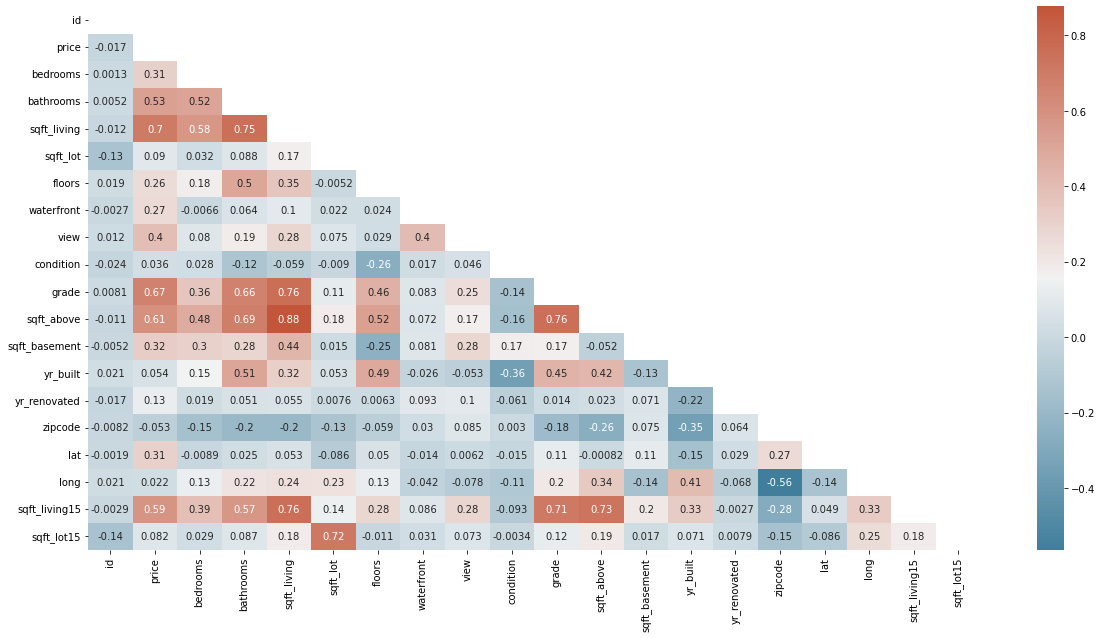

In [30]:
corr=df.corr()
_,ax=plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True,mask=mask,cmap=cmap)


In [ ]:
#Vamos a Implementar 4 regresiones lineares:
#1- sqft_living v. price
#2- sqft_above v. price
#3- grade v. price
#4- sqft_living15 v. price

In [7]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('sqft_living v. price')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

sqft_living v. price
Sqaured mean error 254289.15
R squared training 0.492
R sqaured testing 0.496
intercept [-47235.8113029]
coefficient [[282.2468152]]


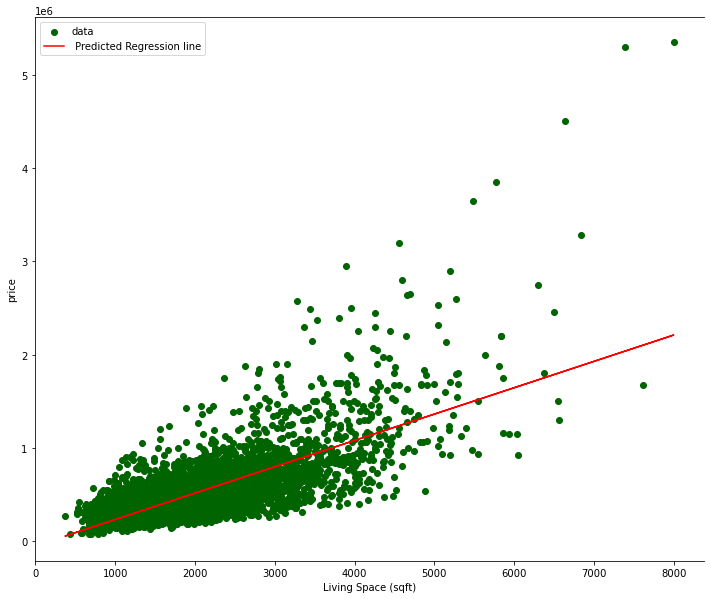

In [8]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [12]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_above']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_above']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('sqft_above v. price')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

sqft_above v. price
Sqaured mean error 282814.45
R squared training 0.364
R sqaured testing 0.377
intercept [57740.49477298]
coefficient [[269.26417436]]


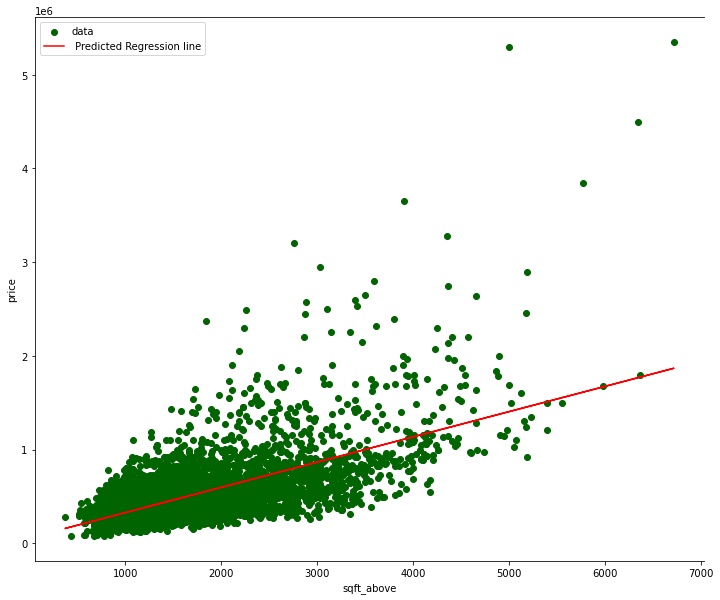

In [13]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [14]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('grade v. price')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

grade v. price
Sqaured mean error 263387.61
R squared training 0.442
R sqaured testing 0.46
intercept [-1061459.62144313]
coefficient [[209225.48270386]]


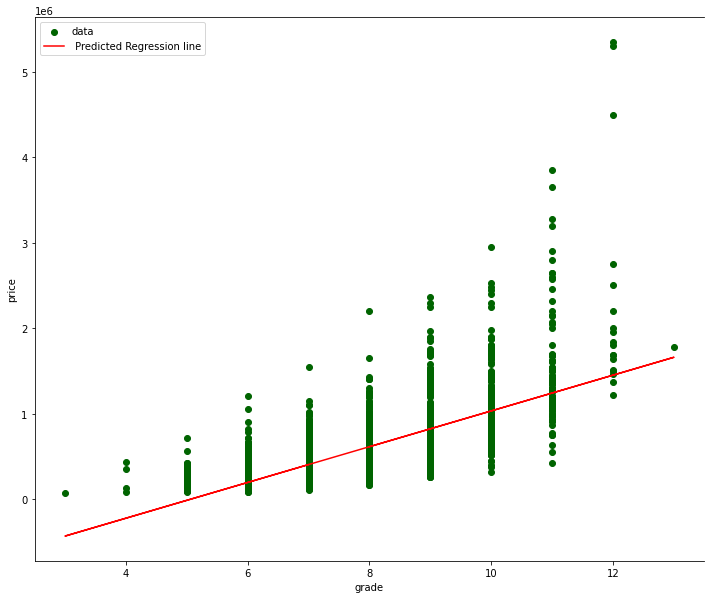

In [15]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('grade')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [16]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living15']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living15']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('sqft_living15 v. price')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),3) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

sqft_living15 v. price
Sqaured mean error 287222.3
R squared training 0.339
R sqaured testing 0.357
intercept [-85347.98348818]
coefficient [[314.59487151]]


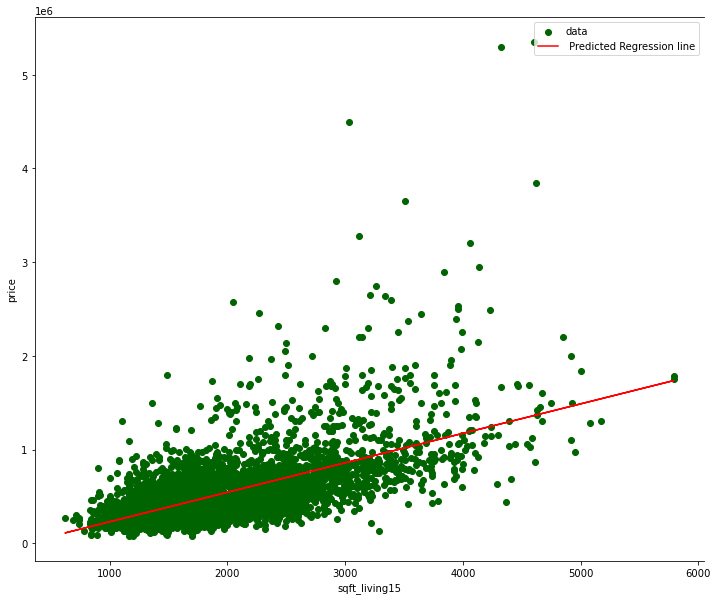

In [17]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('sqft_living15')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)